In [896]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [897]:
def f(x):
    return 3*x**2 - 4*x + 5

In [898]:
f(3.0)

20.0

In [899]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [900]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

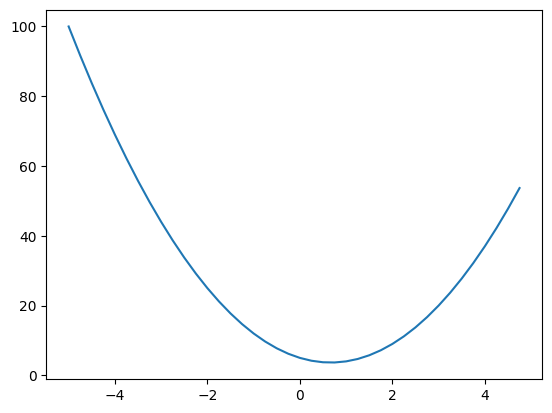

In [901]:
plt.plot(xs, ys)

In [902]:
h = 0.000001
x = 2/3.0
(f(x+h) - f(x))/h

2.999378523327323e-06

In [903]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [904]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c
print(f'd1: {d1:.4f}, d2: {d2:.4f}, slope: {(d2-d1)/h:.4f}')

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h
d2 = a*b + c
print(f'd1: {d1:.4f}, d2: {d2:.4f}, slope: {(d2-d1)/h:.4f}')

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c
print(f'd1: {d1:.4f}, d2: {d2:.4f}, slope: {(d2-d1)/h:.4f}')

d1: 4.0000, d2: 3.9997, slope: -3.0000
d1: 4.0000, d2: 4.0002, slope: 2.0000
d1: 4.0000, d2: 4.0001, slope: 1.0000


In [905]:
class Value:

    def __init__(self, data, label='', _children=(), _op=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f'Value(data={self.data})'

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)

        out = Value(self.data + other.data, _children=(self, other), _op='+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward

        return out

    def __radd__(self, other):
        return self + other

    def __neg__(self):
        return self * -1

    def __sub__(self, other):
        return self + (-other)

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)

        out = Value(self.data * other.data, _children=(self, other), _op='*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward

        return out

    def __rmul__(self, other):
        return self * other

    def __pow__(self, other):
        # Only support int or float powers
        assert isinstance(other, (int, float))
        out = Value(self.data**other, _children=(self,), _op=f'^{other}')

        def _backward():
            self.grad += (other * self.data**(other-1)) * out.grad

        out._backward = _backward

        return out

    def __truediv__(self, other):
        return self * (other**-1)

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)

        out = Value(t, _children=(self,), _op='tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad

        out._backward = _backward

        return out

    def exp(self):
        x = self.data

        out = Value(math.exp(x), _children=(self,), _op='exp')

        def _backward():
            self.grad += out.data * out.grad

        out._backward = _backward

        return out

    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)

        self.grad = 1.0

        for node in reversed(topo):
            node._backward()

In [906]:
print(f'{(3 * Value(2)).exp()} {Value(2)/Value(4)} {(Value(0.5)**-1) - 0.1} {-Value(1)}')

Value(data=403.4287934927351) Value(data=0.5) Value(data=1.9) Value(data=-1)


In [907]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
a, b, c

(Value(data=2.0), Value(data=-3.0), Value(data=10.0))

In [908]:
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
d

Value(data=4.0)

In [909]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [910]:
d._op

'+'

In [911]:
f = Value(-2.0, label='f')
L = d * f; L.label='L'

In [912]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label='{ %s | data %.4f | grad %.4f }' % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=uid + n._op, label=n._op)
            dot.edge(uid+n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot

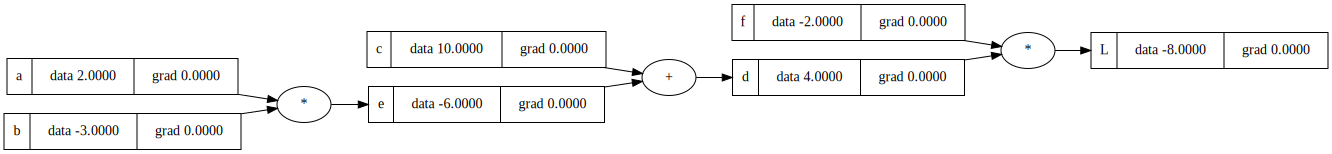

In [913]:
draw_dot(L)

In [914]:
L.grad = 1.0
f.grad = 4.0
d.grad = -2.0
c.grad = -2.0
e.grad = -2.0
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0

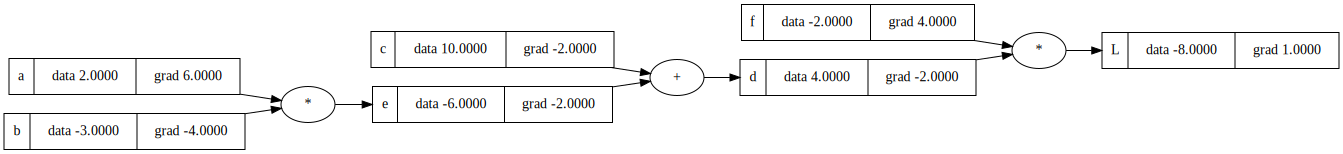

In [915]:
draw_dot(L)

In [916]:
def lol():
    h = 0.0001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    b.data += h
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')

    L = d * f; L.label='L'
    L2 = L

    print((L2.data-L1.data)/h)
lol()

-4.000000000008441


In [917]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L)

Value(data=-7.286496)


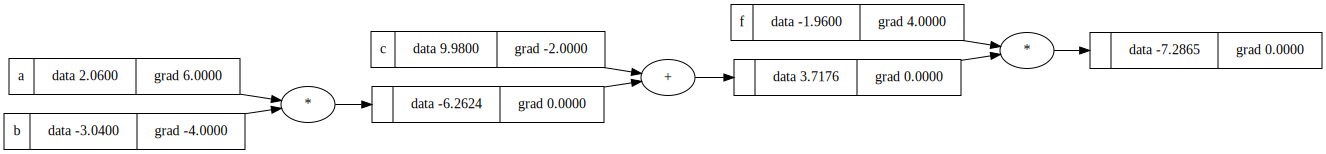

In [918]:
draw_dot(L)

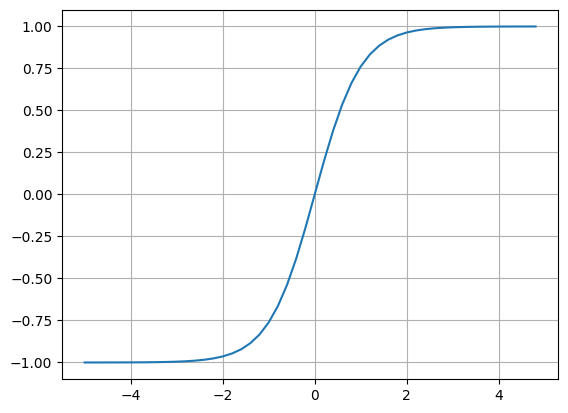

In [919]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2)))
plt.grid()

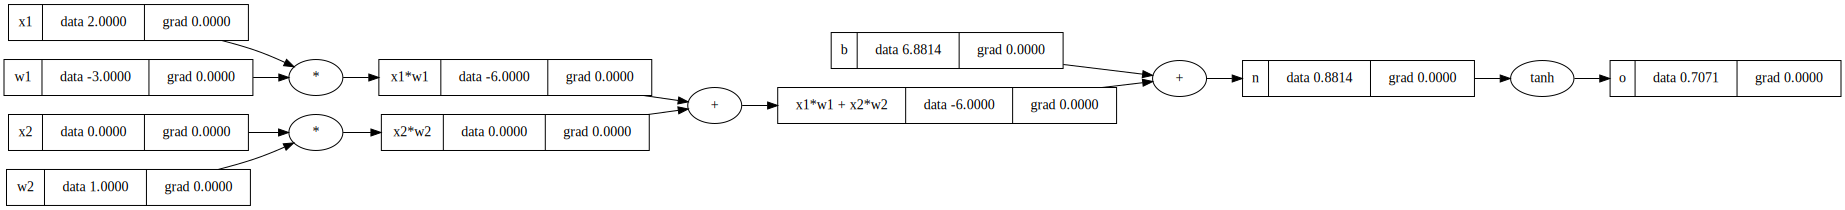

In [920]:
# Inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# Weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# Bias
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1_x2w2 = x1w1 + x2w2; x1w1_x2w2.label = 'x1*w1 + x2*w2'
n = x1w1_x2w2 + b; n.label = 'n'

o = n.tanh(); o.label='o'

draw_dot(o)

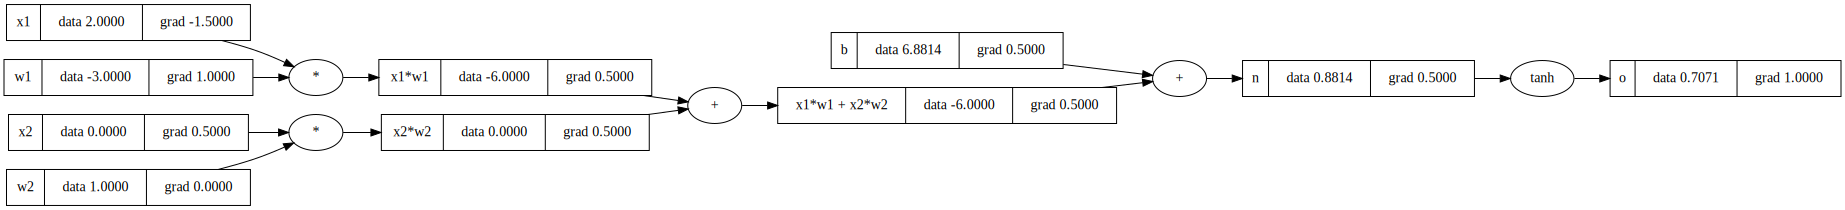

In [921]:
o.grad = 1
n.grad = 0.5
x1w1_x2w2.grad = 0.5
b.grad = 0.5
x1w1.grad = 0.5
x2w2.grad = 0.5
x2.grad = w2.data * 0.5
w2.grad = x2.data * 0.5
x1.grad = w1.data * 0.5
w1.grad = x1.data * 0.5

draw_dot(o)

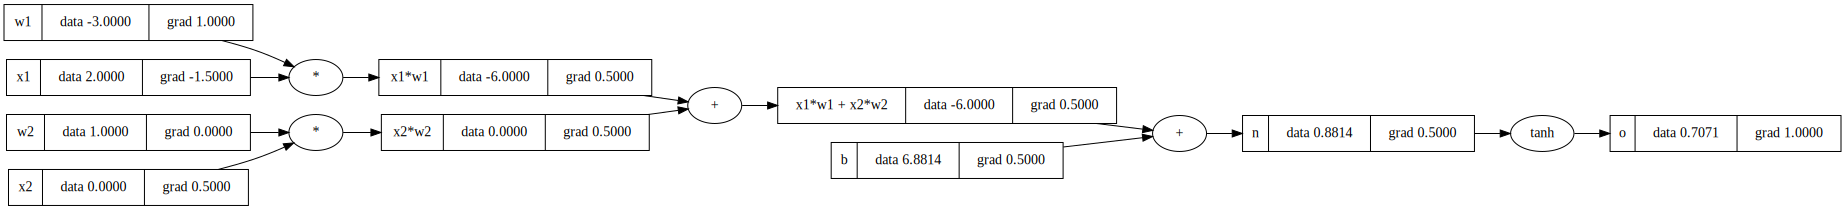

In [922]:
# Inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# Weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# Bias
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1_x2w2 = x1w1 + x2w2; x1w1_x2w2.label = 'x1*w1 + x2*w2'
n = x1w1_x2w2 + b; n.label = 'n'

o = n.tanh(); o.label='o'

o.grad = 1.0
o._backward()
n._backward()
b._backward()
x1w1_x2w2._backward()
x2w2._backward()
x1w1._backward()

draw_dot(o)

In [923]:
topo = []
visited = set()

def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)

build_topo(o)
topo

[Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

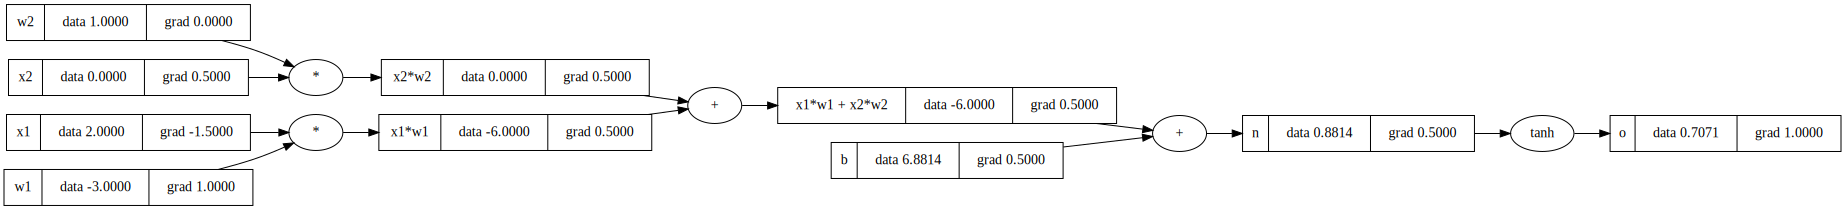

In [924]:
# Inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# Weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# Bias
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1_x2w2 = x1w1 + x2w2; x1w1_x2w2.label = 'x1*w1 + x2*w2'
n = x1w1_x2w2 + b; n.label = 'n'

o = n.tanh(); o.label='o'

o.grad = 1.0

topo = []
visited = set()
build_topo(o)

for node in reversed(topo):
    node._backward()

draw_dot(o)

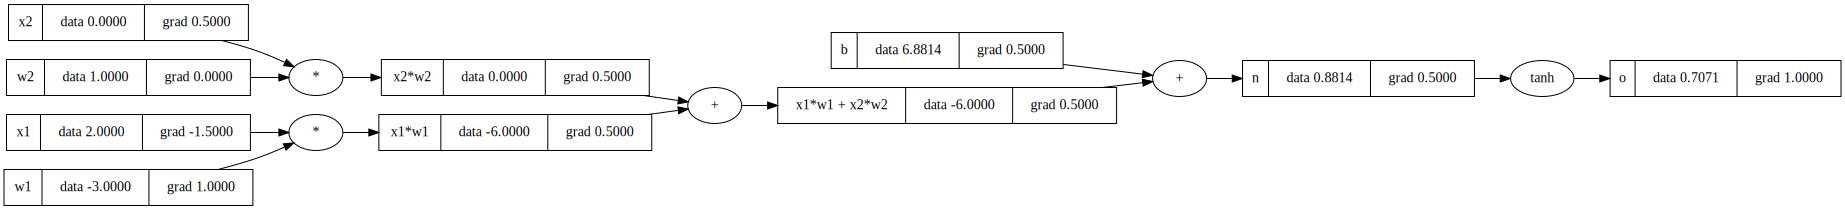

In [925]:
# Inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# Weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# Bias
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1_x2w2 = x1w1 + x2w2; x1w1_x2w2.label = 'x1*w1 + x2*w2'
n = x1w1_x2w2 + b; n.label = 'n'

o = n.tanh(); o.label='o'

o.backward()

draw_dot(o)

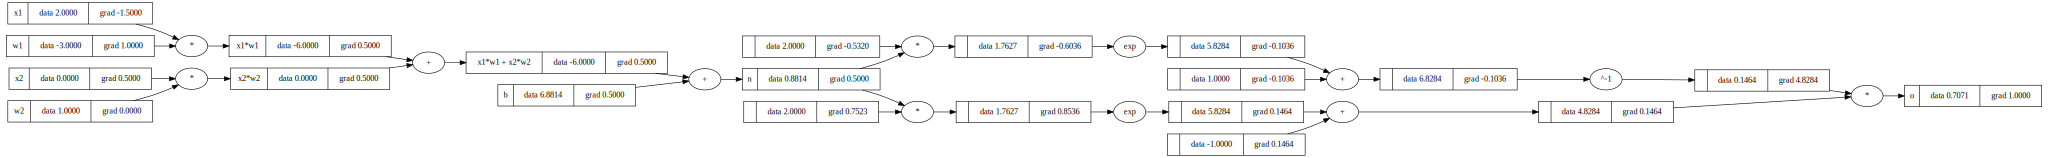

In [926]:
# Inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# Weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# Bias
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1_x2w2 = x1w1 + x2w2; x1w1_x2w2.label = 'x1*w1 + x2*w2'
n = x1w1_x2w2 + b; n.label = 'n'

o = ((2*n).exp() - 1) / ((2*n).exp() + 1); o.label='o'

o.backward()

draw_dot(o)

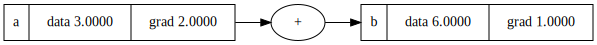

In [927]:
a = Value(3.0, label='a')
b = a + a; b.label='b'
b.backward()
draw_dot(b)

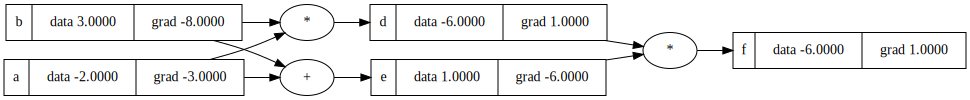

In [928]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a*b; d.label='d'
e = a+b; e.label='e'
f = d*e; f.label='f'

f.backward()

draw_dot(f)

In [929]:
import torch

# Inputs
x1 = torch.tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.tensor([0.0]).double(); x2.requires_grad = True
# Weights
w1 = torch.tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.tensor([1.0]).double(); w2.requires_grad = True
# Bias
b = torch.tensor([6.8813735870195432]).double(); b.requires_grad = True
n = x1 * w1 + x2 * w2 + b

o = torch.tanh(n)

print(f'{o.data.item()=}')

o.backward()

print('---')
print(f'{x1.grad.item()=}')
print(f'{w1.grad.item()=}')
print(f'{x2.grad.item()=}')
print(f'{w2.grad.item()=}')

o.data.item()=0.7071066904050358
---
x1.grad.item()=-1.5000003851533106
w1.grad.item()=1.0000002567688737
x2.grad.item()=0.5000001283844369
w2.grad.item()=0.0


In [930]:
class Neuron:

    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x):
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out

    def parameters(self):
        return self.w + [self.b]

In [931]:
x = [2.0, 3.0]
n = Neuron(2)
n(x)

Value(data=-0.9968962600001389)

In [932]:
class Layer:

    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [param for neuron in self.neurons for param in neuron.parameters()]

In [933]:
x = [2.0, 3.0]
l = Layer(2, 3)
l(x)

[Value(data=-0.6761382035635171),
 Value(data=0.8718209993457327),
 Value(data=-0.9993337987856434)]

In [934]:
class MultiLayerPerceptron:

    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [param for layer in self.layers for param in layer.parameters()]

In [935]:
x = [2.0, 3.0, -1.0]
mlp = MultiLayerPerceptron(3, [4, 4, 1])
mlp(x)

Value(data=0.5551976215212714)

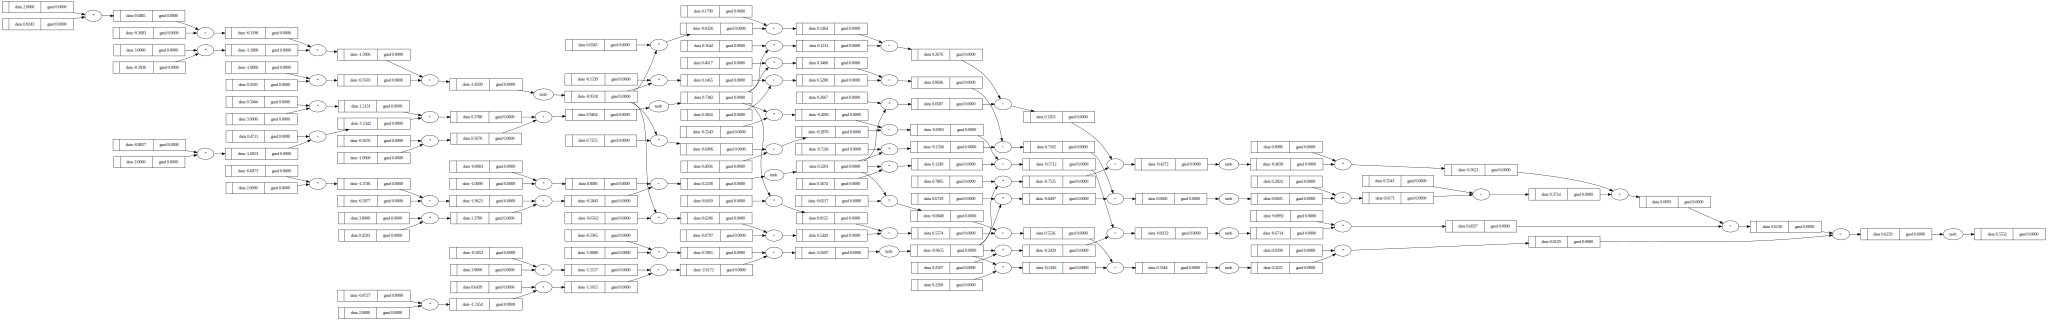

In [936]:
draw_dot(mlp(x))

In [937]:
mlp = MultiLayerPerceptron(3, [4, 4, 1])
xs = [
    [2.0,  3.0, -1.0],
    [3.0, -1.0,  0.5],
    [0.5,  1.0,  1.0],
    [1.0,  1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0]
ypred = [mlp(x) for x in xs]
ypred

[Value(data=0.4452725320586215),
 Value(data=0.14359503830563666),
 Value(data=0.4706657797275494),
 Value(data=0.3945833929794321)]

In [938]:
list((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

[Value(data=0.30772256368865314),
 Value(data=1.3078096116372704),
 Value(data=2.162857835661641),
 Value(data=0.3665292680562967)]

In [939]:
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data=4.144919279043862)

In [940]:
mlp.layers[0].neurons[0].w[0].grad

0.0

In [941]:
loss.backward()

In [942]:
mlp.layers[0].neurons[0].w[0].grad

-0.0694720220952944

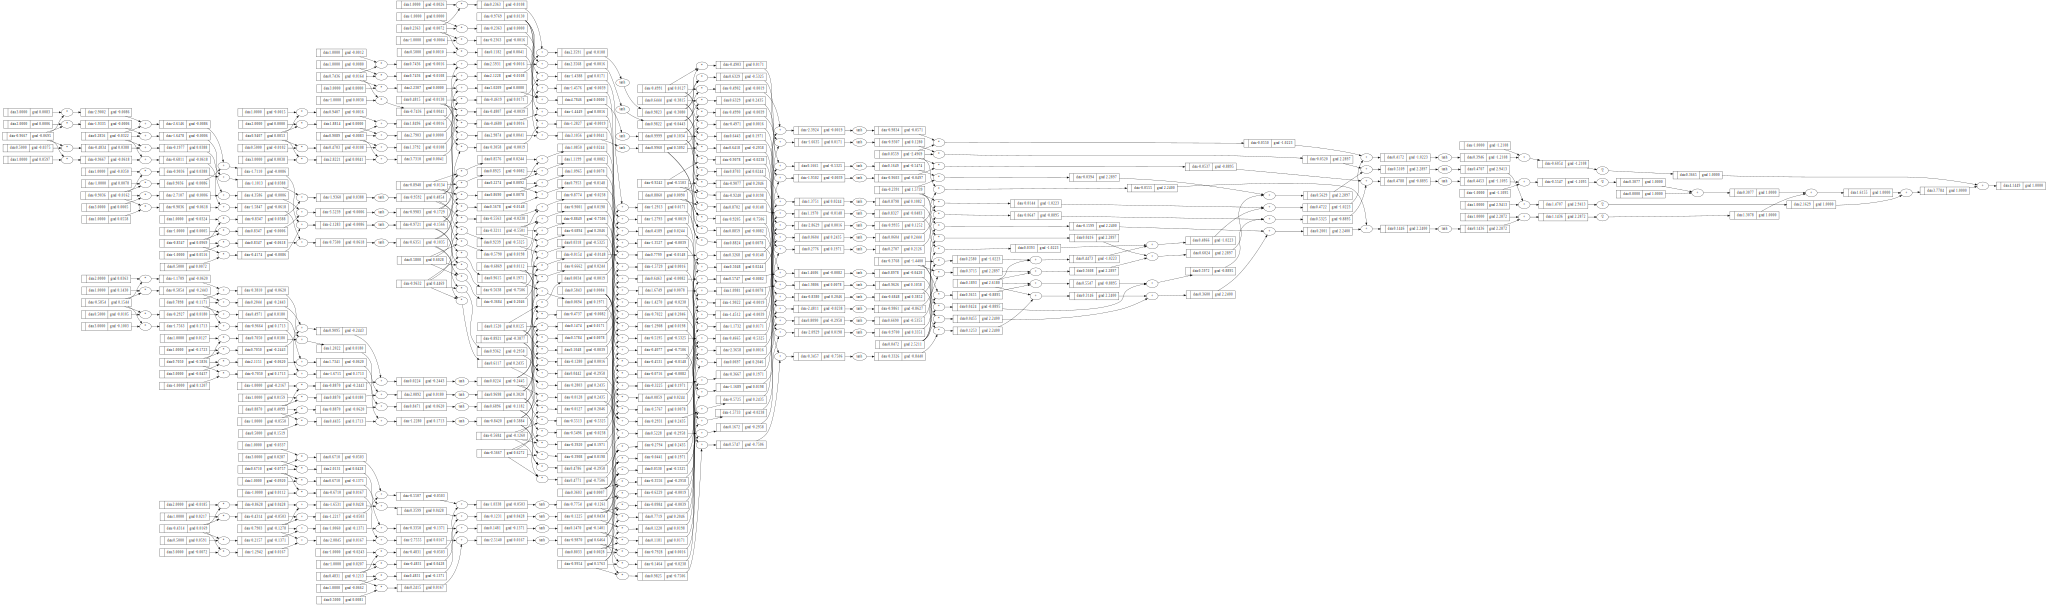

In [943]:
draw_dot(loss)

In [944]:
mlp.parameters()

[Value(data=-0.9667298687651635),
 Value(data=-0.9035815791508495),
 Value(data=-0.8347042020063526),
 Value(data=0.2856362122705185),
 Value(data=-0.5854263278610112),
 Value(data=0.7050472672375712),
 Value(data=0.8870091285991624),
 Value(data=0.7898326422159663),
 Value(data=-0.4314059738802418),
 Value(data=0.6710207395616028),
 Value(data=0.4830877152525319),
 Value(data=-0.7903072990462896),
 Value(data=0.9406838385333305),
 Value(data=0.7435527629285981),
 Value(data=0.23632343764976182),
 Value(data=0.9089046231726707),
 Value(data=0.5799744422785194),
 Value(data=-0.5666838791166333),
 Value(data=-0.9954152767877158),
 Value(data=-0.9241713841536638),
 Value(data=-0.3210886845192562),
 Value(data=-0.8940302887288079),
 Value(data=-0.6868956384941347),
 Value(data=0.5843348194260107),
 Value(data=0.8859979983598518),
 Value(data=0.22744948024504952),
 Value(data=-0.9631570504175855),
 Value(data=-0.5684451167662634),
 Value(data=0.36030083049450434),
 Value(data=0.644356027279

In [945]:
len(mlp.parameters())

41

In [ ]:
mlp = MultiLayerPerceptron(3, [4, 4, 1])
xs = [
    [2.0,  3.0, -1.0],
    [3.0, -1.0,  0.5],
    [0.5,  1.0,  1.0],
    [1.0,  1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0]
ypred = [mlp(x) for x in xs]
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
print(f'Loss before gradient descent: {loss}')
print(f'Sample neuron weight before gradient descent: {mlp.layers[0].neurons[0].w[0].data=}, {mlp.layers[0].neurons[0].w[0].grad=}')
for p in mlp.parameters():
    p.data += -0.01 * p.grad
ypred = [mlp(x) for x in xs]
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
print(f'Loss after gradient descent:  {loss}')
print(f'Sample neuron weight after gradient descent:  {mlp.layers[0].neurons[0].w[0].data=}, {mlp.layers[0].neurons[0].w[0].grad=}')

Loss before gradient descent: Value(data=2.427017329966374)
Sample neuron weight before gradient descent: mlp.layers[0].neurons[0].w[0].data=0.23420053387562034, mlp.layers[0].neurons[0].w[0].grad=0.0
Loss after gradient descent: Value(data=2.427017329966374)
Sample neuron weight after gradient descent: mlp.layers[0].neurons[0].w[0].data=0.23420053387562034, mlp.layers[0].neurons[0].w[0].grad=0.0
